# Rigorous Optimization
## Introduction

We have already used some optimizations implicitly in several parts of implementation. Most of them are simple enough to be completed in several seconds. Although such simple optimizations can provide useful results for easy cases, they are not powerful enough for many other cases where component peaks are not visible.

For those hard-to-analyze cases, the problem gets underdetermined, meaning there are so many possible solutions that we are not sure which one is appropriate. 

However, we can utilize SEC and SAXS theories to reduce the solution space. More concretely, we can add constraints based on the theories. For example, in plain words, 

* Larger particles elute faster than smaller ones,
* Peaks broaden as they stay longer in the column,
* Reconstructed Rg curve should be consistent with observed Rg curve.

We can impose these constraints by adding parameters, using advanced models and adopting global optimization methods.

In this chapter, we will show how to use such rigorous optimizations leaving the detailed discussion elsewhere.

## How to get initial parameters

For the global optimization, the standard way of preparing initial parameters is one of the following.

* EGH: decomposition = ssd.quick_decomposition(proportions=[...])
* SDM: sdm_decomposition = decomposition.optimizw_with_model('SDM')
* EDM: edm_decomposition = decomposition.optimizw_with_model('EDM')

For EGH, the default decomposition, preferably with proportions option, suffices.
For other advanced models, use the EGH decomposition to get respective model parameters with optimizw_with_model method.

## EGH Quick Decomposition

Note that we have included the rgcurve here because it is required later for the rigorous optimization. 

100%|██████████| 203/203 [00:17<00:00, 11.79it/s]


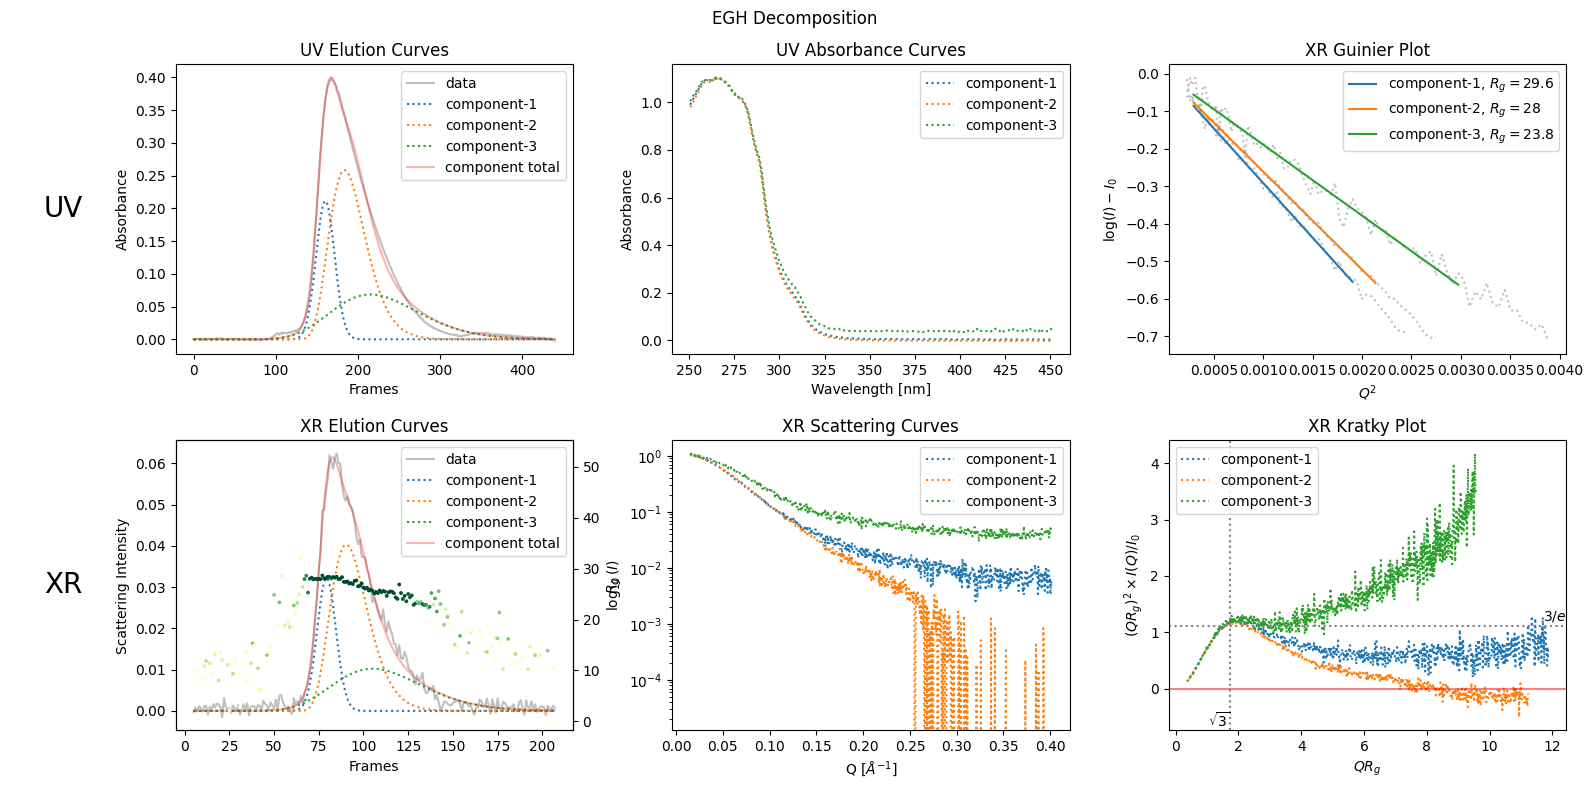

In [1]:
from molass import get_version
assert get_version() >= '0.7.5', "this notebook requires molass v0.7.5 or higher."
from molass_data import SAMPLE4
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE4)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
decomposition = corrected_ssd.quick_decomposition(proportions=[0.2, 0.5, 0.3])
rgcurve = corrected_ssd.xr.compute_rgcurve()
plot6 = decomposition.plot_components(title="EGH Decomposition", rgcurve=rgcurve)

## EGH Rigorous Optimization

In [ ]:
run_info = decomposition.optimize_rigorously(rgcurve=rgcurve, analysis_folder="temp_analysis_egh", method='NS', niter=20)

len(x), len(y), len(sy): 203 203 203
len(x), len(y), len(sy): 441 441 441
len(x), len(y), len(sy): 203 203 203
len(x), len(y), len(sy): 441 441 441
len(x), len(y), len(sy): 203 203 203


c:\Program Files\Python313\Lib\site-packages\molass_legacy\Trimming\Sigmoid.py:14: RuntimeWarning: overflow encountered in exp
  return L/(1 + np.exp(-k*(x-x0))) + b
get_spline:   File "c:\Program Files\Python313\Lib\site-packages\scipy\interpolate\_fitpack2.py", line 920, in __init__
    raise ValueError(_fpchec_error_string)
ValueError: The input parameters have been rejected by fpchec. This means that at least one of the following conditions is violated:

1) k+1 <= n-k-1 <= m
2) t(1) <= t(2) <= ... <= t(k+1)
   t(n-k) <= t(n-k+1) <= ... <= t(n)
3) t(k+1) < t(k+2) < ... < t(n-k)
4) t(k+1) <= x(i) <= t(n-k)
5) The conditions specified by Schoenberg and Whitney must hold
   for at least one subset of data points, i.e., there must be a
   subset of data points y(j) such that
       t(j) < y(j) < t(j+k+1), j=1,2,...,n-k-1


curve_fit(sigmoid, fx, fy, p0) failure:   File "c:\Program Files\Python313\Lib\site-packages\scipy\optimize\_minpack_py.py", line 1026, in curve_fit
    raise Runtime

do_mapping result ------------------ correlation= 0.9991817422653649
make_it_compatible_from_sliced result ------------------ correlation= 0.9991817422653649
ptx_ratio= 0.3276737562966875
excess_width_ratio=0
symmetry_deviation=1
remaining_ratio= 0.004834884333595769
labels= [2 1 1 4 1 0 1 4 3 2]
============================= try_fc_model_fit: slice= slice(0, np.int64(142), None)
fit_sigmoid_impl_impl: (s1, s2)=(3.38e-06, -2.13e-05)
k=2.65 > K_LIMIT, L_ratio=0.39
sig_ratio= 0.02296575863899836
============================= try_fc_model_fit: slice= slice(np.int64(252), None, None)
fit_sigmoid_impl_impl: (s1, s2)=(-5.32e-06, 0.000314)
fit_sigmoid_impl_impl: (s1, s2)=(-5.34e-06, -0.000153)
L_ratio= 0.16551153531794643
dist_ratio=0.0736
outstanding_ratio=5.61, (min_dist, max_dist)=(0.557, 329)
============================= try_fc_model_fit: slice= slice(108, 169, None)
(error_ratio_, error_ratio+allow)=(inf, 0.345), special=False
score= 0.9720635384862512
recognize_num_peaks
peak_width= 29

applied correct_largely_negative_values due to negetve_ratio=0.0998
applied correct_largely_negative_values due to negetve_ratio=0.0985


len(x), len(y), len(sy): 441 441 441
negetve_ratio= 0.09977324263038549
negetve_ratio= 0.09852216748768473
ret.x= [ 1.37989865e-03  1.05008423e+02  4.44447578e+01  2.24547801e-04
 -9.81187801e-04 -8.87149796e-06 -2.45339067e-02]
ret.x= [ 1.38434423e-03  1.05199384e+02  1.71250109e+00  2.22553202e-04
  1.61175707e-05 -1.89756167e-06 -2.42049112e-02]
opt_ret.fun= 8.680578885438453e-05
----------------- guess_initial_secparams: poresize= 70


Output()

```{figure} ../../_static/images/rigorous-egh.png
:name: rigorous-egh

Rigorous Optimization (EGH)
```

For more information, see [Molass Technical Report](https://biosaxs-dev.github.io/molass-technical/).